## Survival Analysis

#### Working with the Kaplan-Meier function

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np

# Importing the Kaplan-MeierFitter package for the survival analysis
from lifelines import KaplanMeierFitter

In [2]:
duration_in_months = np.random.randint(1, 19, size=51)
attrite = np.random.randint(0, 2, size=51)
increment = np.random.randint(0, 2, size=51)

print(duration_in_months, attrite, increment)

[ 7  6  6 12  9 13  4 13  1  7 15  5 10  5  2  8 18  7  5  3 17  1 13  1
 12 17 14 17 18 17  1  5  7 15  7 12  4  6 13 17 14 17  1  3 12  6  6  5
  4 10  1] [0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0
 1 0 0 1 0 0 1 1 1 1 1 0 1 1] [1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1
 1 1 0 0 1 1 0 1 1 1 1 0 0 0]


In [3]:
empsur = {
    'Duration_in_Months': duration_in_months,
    'Attrite': attrite,
    'Increment': increment
}

# Creating the dataframe
empsur_df = pd.DataFrame(empsur)
empsur_df.head(10)


,Duration_in_Months,Attrite,Increment
0,7,0,1
1,6,1,1
2,6,1,0
3,12,0,0
4,9,1,0
5,13,0,1
6,4,0,0
7,13,1,1
8,1,1,1
9,7,0,0


In [4]:
empsur_df.describe()

,Duration_in_Months,Attrite,Increment
count,51.000000,51.000000,51.000000
mean,8.803922,0.450980,0.529412
std,5.466332,0.502543,0.504101
min,1.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000
50%,7.000000,0.000000,1.000000
75%,13.000000,1.000000,1.000000
max,18.000000,1.000000,1.000000


In [5]:
empsur_df.to_csv('survival_analysis.csv', index=False)

### 2. Survival Analysis

It's time to use the Kaplan-MeierFitter to calculate the survival curves

In [7]:
# First we need to inicialize the Kaplan-MeierFitter model and we storage into a variable for later use
kmf = KaplanMeierFitter()

# We can change the name of the columns for better under
empsur_df.columns = "Spell", "Event", "Increment"
empsur_df.head()

,Spell,Event,Increment
0,7,0,1
1,6,1,1
2,6,1,0
3,12,0,0
4,9,1,0


In [9]:
# Let's fit the data into the kmf function
kmf.fit(empsur_df['Spell'], event_observed = empsur_df['Event'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 51 total observations, 28 right-censored observations>

<Axes: xlabel='timeline'>

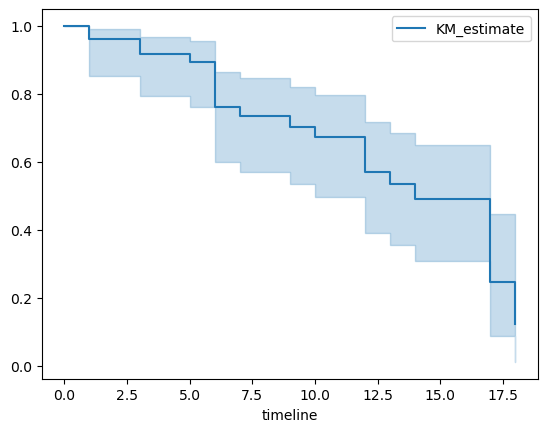

In [10]:
# Checking the status of our curve
kmf.plot()

In [12]:
# With the results, it´s time to split the data
empsur_df['Increment'].value_counts()

1    27
0    24
Name: Increment, dtype: int64

### 2.1 Survival Analysis separated values

It´s time to compare between those employees how receive the increment with those who do not receive the increment. We apply kmf to the time and increment column. We will require to separte the values too

<Axes: xlabel='timeline'>

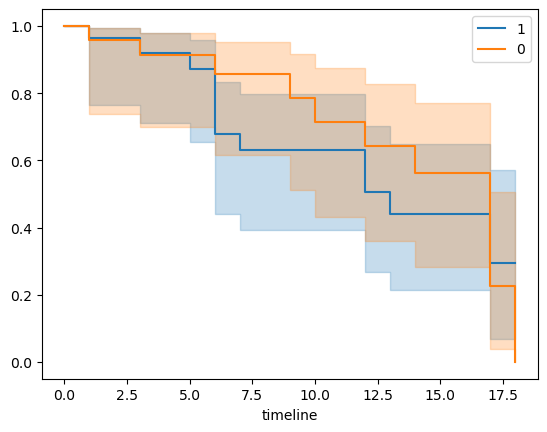

In [22]:
# KMF for value 1
kmf.fit(empsur_df.loc[empsur_df['Increment'] == 1, 'Spell'],
empsur_df.loc[empsur_df['Increment'] == 1, 'Event'],
label = '1' )
ax = kmf.plot()

# KMF for value 0
kmf.fit(empsur_df.loc[empsur_df['Increment'] == 0, 'Spell'],
empsur_df.loc[empsur_df['Increment'] == 0, 'Event'],
label = '0' )
kmf.plot(ax=ax)
